In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

# Load the CSV file
# file_path = r"20250704_bands_ff_23p3_eps_10p89.csv"  
file_path = r"20250707_bands_ff_20p7_eps_10p89.csv"

In [2]:
freqs = []
k_points = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        freqs.append(row[5:])
        k_points.append(row[0])


In [3]:
freqs = np.array(freqs[1:],dtype=float)
k_points= np.array(k_points[1:],dtype=float)
print(k_points.shape,freqs.shape)

(9,) (9, 300)


In [4]:
def get_gaps(list_freqs):
    flattened_lambdas = np.sort(np.concatenate(list_freqs))
    gaps = np.diff(flattened_lambdas)
    max_gap_index = np.argmax(gaps)
    bandgap_lower = flattened_lambdas[max_gap_index]
    bandgap_upper = flattened_lambdas[max_gap_index + 1]
    gap_width = (bandgap_upper-bandgap_lower)/((bandgap_upper+bandgap_lower)/2)

    return bandgap_lower,bandgap_upper,gap_width

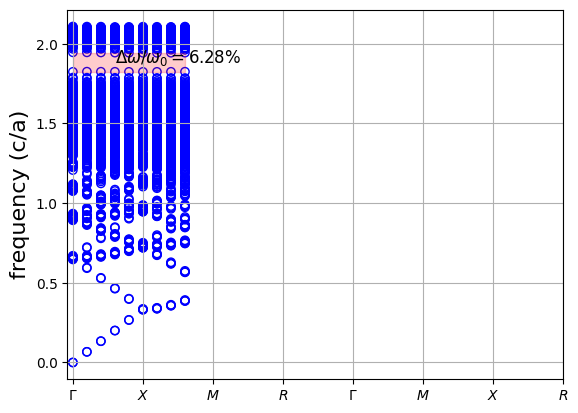

In [7]:
for item in freqs.T:
    plt.scatter(k_points-1,(item), color="blue",facecolors='none')

# plt.plot(k_points,freqs, color='blue',linewidth=0.1)
tick_labs = [r'$\Gamma$', r'$X$', r'$M$', r'$R$',r'$\Gamma$', r'$M$',r'$X$',r'$R$']
plt.ylabel('frequency (c/a)', size=16)
points_in_between = 4
tick_locs = [i*points_in_between+i for i in range(len(tick_labs))]

gap = get_gaps(freqs)
plt.fill_between(k_points-1,gap[0],gap[1], color='red', alpha=0.2)
plt.text(k_points[int(len(k_points)/4)],((gap[0]+gap[1])/2), rf'$\Delta \omega / \omega_0 = {gap[2]*100 :.2f}$%', fontsize = 12)
plt.grid(True)
plt.xticks(tick_locs, tick_labs)
# plt.ylim(1.5,2)
plt.show()

In [6]:
2.04/(0.8/(((gap[0]+gap[1])/2)/(11.43)))

0.42029934383202094